## Rede neuronal

In [175]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score, precision_score, matthews_corrcoef, confusion_matrix,accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_classification

X,y = load_iris(return_X_y=True)

In [177]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.15)
scaler = StandardScaler()
scaler.fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [167]:
class Activation_function:
    """General classe of the activation function that we will use at the neural networks
    """
    @staticmethod
    def phi(x):
        return
    @staticmethod
    def dphi_dx(x):
        return
    
class Sigmoid(Activation_function):
    """Classe for the sigmoid activation function
    """
    import numpy as np
    def __init__(self):
        super().__init__()
    
    @staticmethod
    def phi(x):
        """definition of sigmoid function

        Args:
            x (float): a value

        Returns:
            float: the result of the sigmoid function for the value x
        """
        return 1/(1+np.exp(-x))
    
    @staticmethod
    def dphi_dx(x):
        """definition of the derivative of the sigmoid function
        
        Args:
            x (float): a value

        Returns:
            float: the result of the derivite of the sigmoid function for the value x
        """
        return np.exp(-x)/((1+np.exp(-x))**2)


class Softplus(Activation_function):
    """Classe for the softplus activation function
    """
    import numpy as np
    def __init__(self):
        super().__init__()
    
    @staticmethod
    def phi(x):
        """definition of softplus function

        Args:
            x (float): a value

        Returns:
            float: the result of the softplus function for the value x
        """
        return np.log(1+np.exp(x))
    
    @staticmethod
    def dphi_dx(x):
        """definition of the derivative of the softplus function
        
        Args:
            x (float): a value

        Returns:
            float: the result of the derivative of the softplus function for the value x
        """
        return np.exp(x)/(1+np.exp(x))
    
class Relu(Activation_function):
    def __init__(self):
        super().__init__()
    
    @staticmethod
    def phi(x):
        """definition of the Relu function
        
        Args:
            x (float): a value

        Returns:
            float: the result of the Relu function for the value x
        """
        if x <= 0:
            return 0
        else:
            return x
    
    @staticmethod
    def dphi_dx(x):
        """definition of the derivative of the Relu function
        
        Args:
            x (float): a value

        Returns:
            float: the result of the derivative of the Relu function for the value x
        """
        if x <= 0:
            return 0
        else:
            return 1

class Softmax:
    """classe for the softmax function

    """
    @staticmethod
    def soft(c,classes):
        """definition of the softmax function for a classe c (important for a multiclass problem)

        Args:
            c (int): index with the classe c
            classes (numpy.array): list for the values for each classe

        Returns:
            the value of the softmax function for a classe
        """
        sum = 0
        for i in range(len(classes)):
            sum += np.exp(classes[i])
        return np.exp(classes[c])/sum
    
    @staticmethod
    def dpi_doi(pi):
        """derivative of the softmax value for a classe i for the case that the probability (softmax value) correspond to the output
 
        Args:
            pi (float): probability of the classe i

        Returns:
            float: gradient of the softmax value for this case
        """
        return pi*(1-pi)
    
    @staticmethod
    def dpi_doj(pi,pj):
        """derivative of the softmax value for a classe i for the case that the probability (softmax value) is not the same that the output
 
        Args:
            pi (float): probability of the classe i
            pj (float): probability of the classe j

        Returns:
            float: gradient of the softmax value for this case
        """
        return -pi*pj

In [168]:
class Neural_network:
    def __init__(self,n_hidden,n_inputs,activation_function, alpha=0.1, n_epochs=1000):
        """class for a neural network with one output and one layer of hidden neurons

        Args:
            n_hidden (int): number of hidden layers
            n_inputs (int): number of inputs
            activation_function (Activation_Function): activation function
            alpha (float, optional): learning rate. Defaults to 0.1.
            n_epochs (int, optional): number of epochs for the training. Defaults to 1000.
        """
        self.n_hidden = n_hidden
        self.n_inputs = n_inputs
        self.w_o = np.random.rand(self.n_hidden)
        self.w_i = np.random.rand(self.n_hidden,self.n_inputs)
        self.b_i = np.zeros(self.n_hidden)
        self.b_o = 0
        self.h = np.zeros(self.n_hidden)
        self.alpha = alpha
        self.n_int = n_epochs
        self.activation_function = activation_function

    def v_i(self,i,x):
        """calculate field value for hidden neuron i

        Args:
            i (int): index of the hidden neuron
            x (numpy.array): input vector

        Returns:
            float: field value for the hidden neuron i
        """
        xi = 0
        for j in range(self.n_inputs):
            xi += self.w_i[i][j]*x[j]
        return xi + self.b_i[i]

    def v_o(self):
        """calculate field value for the output neuron
        Returns:
            float: field value for the output neuron
        """
        xo = 0
        for i in range(self.n_hidden):
            xo += self.w_o[i]*self.h[i]
        return xo + self.b_o

    def hidden_layer(self,x):
        """update the values for each hidden neuron based on a input vector x

        Args:
            x (numpy.array): input vector
        """
        for i in range(self.n_hidden):
            vi = self.v_i(i,x)
            self.h[i] = self.activation_function.phi(vi)

    def output_layer(self,x):
        """return the output value of the network basead on a input vector and the weights and bias of the network

        Args:
            x (numpy.array): input vector

        Returns:
            float: the output value
        """
        self.hidden_layer(x)
        return self.activation_function.phi(self.v_o())

    def dS_dbo(self,d,o):
        """gradient of the error function (sum of the squared residuals) for the bias of the output neuron

        Args:
            d (int): correct value
            o (float): prediction

        Returns:
            _type_: the value of the gradient
        """
        v = self.v_o()
        return -(d-o)*self.activation_function.dphi_dx(v)

    def dS_dw_i_o(self,d,o,hi):
        """gradient of the error function (sum of the squared residuals) for the weight between the output neuron and the hidden neuron hi

        Args:
            d (int): correct value
            o (float): prediction
            hi (float) : output of the hidden neuron i

        Returns:
            _type_: the value of the gradient
        """
        return self.dS_dbo(d,o)*hi

    def dS_dbi(self,d,o,x,i):
        """gradient of the error function (sum of the squared residuals) for the bias of the hidden neuron i

        Args:
            d (int): correct value
            o (float): prediction
            x (numpy.array): input vector
            i (int): index of hidden neuron

        Returns:
            float: the value of the gradient
        """
        v = self.v_o()
        vi = self.v_i(i,x)
        return -(d-o)*self.activation_function.dphi_dx(v)*self.w_o[i]*self.activation_function.dphi_dx(vi)

    def dS_dw_i_j(self,d,o,x,i,j):
        """gradient of the error function (sum of the squared residuals) for the weight between the hidden neuron i and the input j

        Args:
            d (int): correct value
            o (float): prediction
            x (numpy.array): input vector
            i (int): index of hidden neuron
            j (int): index of the input neuron

        Returns:
            float: the value of the gradient
        """
        return self.dS_dbi(d,o,x,i)*x[j]

    def SSR(self,d,o):
        """calculates the value of the sum of the squared residuals

        Args:
            d (array): array with the true values
            o (array): array with the respect predictions

        Returns:
            float: value of SSR
        """
        sum = 0
        for i in range(len(d)):
            sum += 0.5*(d[i]-o[i])**2
        return sum/len(d)

    def train(self,Xtrain,ytrain):
        """execute the train of the neural network

        Args:
            Xtrain (array): matrix with the input vectors
            ytrain (array): vector with the output values
        """
        n_i = 0
        for i in range(self.n_int):
            pred = []
            for k in range(len(Xtrain)):
                o = self.output_layer(Xtrain[k])
                pred.append(o)
                self.b_o = self.b_o - self.alpha*self.dS_dbo(ytrain[k],o)
                for i in range(self.n_hidden):
                    self.w_o[i] = self.w_o[i] - self.alpha*self.dS_dw_i_o(ytrain[k],o,self.h[i])
                    self.b_i[i] = self.b_i[i] - self.alpha*self.dS_dbi(ytrain[k],o,Xtrain[k],i)
                    for j in range(self.n_inputs):
                        self.w_i[i][j] = self.w_i[i][j] - self.alpha*self.dS_dw_i_j(ytrain[k],o,Xtrain[k],i,j)
            ssr = self.SSR(ytrain,pred)
            index = np.arange(len(Xtrain))
            np.random.shuffle(index)
            Xtrain = Xtrain[index]
            ytrain = ytrain[index]
            n_i += 1
            print(f"Epoch {n_i} - erro = {ssr}")

    def predict(self, Xtest):
        """create a array with predictions

        Args:
            Xtest (array): a set of input vectors

        Returns:
            array: array with the predictions
        """
        pred = []
        for i in range(len(Xtest)):
            o = self.output_layer(Xtest[i])
            if o >= 0.5:
                pred.append(1)
            else:
                pred.append(0)
        return np.array(pred)


In [171]:
class Multi_output_neural_network:
    def __init__(self,n_inputs, n_hidden,n_outputs,activation_function,epochs=100, alpha=0.2):
        """class for a neural network with multi output and one layer of hidden neurons

        Args:
            n_hidden (int): number of hidden layers
            n_inputs (int): number of inputs
            n_outputs (int): number of classes
            activation_function (Activation_Function): activation function
            alpha (float, optional): learning rate. Defaults to 0.2.
            n_epochs (int, optional): number of epochs for the training. Defaults to 100.
        """
        self.n_inputs = n_inputs
        self.n_hidden = n_hidden
        self.n_outputs = n_outputs
        self.activation_function = activation_function
        self.epochs = epochs
        self.alpha = alpha
        self.w_o = np.random.rand(self.n_outputs,self.n_hidden)
        self.w_i = np.random.rand(self.n_hidden,self.n_inputs)
        
        self.b_i = np.zeros(n_hidden)
        self.b_o = np.zeros(n_outputs)
        self.hi = np.zeros(n_hidden)
        self.oi = np.zeros(n_outputs)
        self.p = np.zeros(n_outputs)
        self.softmax = Softmax()
        self.voi = np.zeros(n_outputs)
        self.vij = np.zeros(n_hidden)

    def output_layer(self, train=True):
        """update the output values of the network basead on the weights and bias of the network and on the values of the hidden neurons.

        Args:
            train (bool): if true it should apply the softmax function and update the probabilities if false it not apply the softmax function
        """
        for i in range(self.n_outputs):
            soma = 0
            for j in range(self.n_hidden):
                soma += self.w_o[i][j]*self.hi[j]
            self.oi[i] = self.activation_function.phi(soma + self.b_o[i])
            self.voi[i] = soma + self.b_o[i]
        if train:
            for i in range(self.n_outputs):
                self.p[i] = self.softmax.soft(i,self.oi)

    def hidden_layer(self,x):
        """update the values for each hidden neuron based on a input vector x

        Args:
            x (numpy.array): input vector
        """  
        for j in range(self.n_hidden):
            soma = 0
            for k in range(self.n_inputs):
                soma += self.w_i[j][k]*x[k]
            self.vij[j] = soma + self.b_i[j]
            self.hi[j] = self.activation_function.phi(soma + self.b_i[j])

    def dCE_dwoij(self,y):
        """updates the weights between the hidden layer and the output layer

        Args:
            y (int): class of the output of our example
        """
        for i in range(self.n_outputs):
            for j in range(self.n_hidden):
                if self.p[y] != 0:
                    if i == y:
                        self.w_o[i][j] = self.w_o[i][j] - self.alpha*(-1/self.p[y])*self.activation_function.dphi_dx(self.voi[i])*self.hi[j]*self.softmax.dpi_doi(self.p[i])
                    else:
                        self.w_o[i][j] = self.w_o[i][j] - self.alpha*(-1/self.p[y])*self.activation_function.dphi_dx(self.voi[i])*self.hi[j]*self.softmax.dpi_doj(self.p[i],self.p[y])
    

    def dCE_dboi(self,y):
        """updates the bias of the output layer

        Args:
            y (int): class of the output of our example
        """
        for i in range(self.n_outputs):
            if self.p[y] != 0:
                if i == y:
                    self.b_o[i] = self.b_o[i] - self.alpha*(-1/self.p[y])*self.activation_function.dphi_dx(self.voi[i])*self.softmax.dpi_doi(self.p[i])
                else:
                    self.b_o[i] = self.b_o[i] - self.alpha*(-1/self.p[y])*self.activation_function.dphi_dx(self.voi[i])*self.softmax.dpi_doj(self.p[i],self.p[y])


    def dCE_dwijk(self,y,x):
        """updates the weights between the hidden layer and the hidden layer

        Args:
            y (int): class of the output of our example
            x (numpy array): input vector
        """
        for j in range(self.n_hidden):
            for k in range(self.n_inputs):
                soma = 0
                for i in range(self.n_outputs):
                    if i == y:
                        soma += self.activation_function.dphi_dx(self.voi[i])*self.softmax.dpi_doi(self.p[i])*self.w_o[i][j]
                    else:
                        soma += self.activation_function.dphi_dx(self.voi[i])*self.softmax.dpi_doj(self.p[i],self.p[y])*self.w_o[i][j]
                if self.p[y] != 0:
                    self.w_i[j][k] = self.w_i[j][k] - self.alpha*(-1/self.p[y])*x[k]*self.activation_function.dphi_dx(self.vij[j])*soma
    

    def dCE_dbij(self,y):
        """updates the bias of the hidden layer

        Args:
            y (int): class of the output of our example
        """
        for j in range(self.n_hidden):
            soma = 0
            for i in range(self.n_outputs):
                if i == y:
                    soma += self.activation_function.dphi_dx(self.voi[i])*self.softmax.dpi_doi(self.p[i])*self.w_o[i][j]
                else:
                    soma += self.activation_function.dphi_dx(self.voi[i])*self.softmax.dpi_doj(self.p[i],self.p[y])*self.w_o[i][j]
            if self.p[y] != 0:
                self.b_i[j] = self.b_i[j] - self.alpha*(-1/self.p[y])*soma
    

    def cross_entropy(self,ytrain):
        """gets the value of the cross entropy of our predictions

        Args:
            ytrain (numpy.array): outputs of the training set

        Returns:
            float: the value of the cross entropy
        """
        soma = 0
        for y in ytrain:
            if self.p[y] != 0:
                soma = soma - np.log(self.p[y])
            else:
                soma = soma + 10000
        return soma
    
    def train(self,Xtrain,ytrain):
        """execute the train of the neural network

        Args:
            Xtrain (array): matrix with the input vectors
            ytrain (array): vector with the output values
        """
        n_i=0
        for j in range(self.epochs):
            for i in range(len(Xtrain)):
                self.hidden_layer(Xtrain[i])
                self.output_layer()
                self.dCE_dboi(ytrain[i])
                self.dCE_dwoij(ytrain[i])
                self.dCE_dbij(ytrain[i])
                self.dCE_dwijk(ytrain[i],Xtrain[i])
            ce = self.cross_entropy(ytrain)
            index = np.arange(len(Xtrain))
            np.random.shuffle(index)
            Xtrain = Xtrain[index]
            ytrain = ytrain[index]
            n_i += 1
            print(f"Epoch {n_i}, ce - {ce}")

    def predict(self,Xtest):
        """create a array with predictions

        Args:
            Xtest (array): a set of input vectors

        Returns:
            array: array with the predictions
        """
        pred = []
        for i in range(len(Xtest)):
            self.hidden_layer(Xtest[i])
            self.output_layer(train=False)
            pred.append(np.argmax(self.oi))
        return pred


                

#### Example for a multi-class problem

In [187]:
X,y = load_iris(return_X_y=True)
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.15)
scaler = StandardScaler()
scaler.fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [188]:
model = Multi_output_neural_network(4,4,3,Softplus(),100,alpha=0.01)
model.train(Xtrain,ytrain)
preds = model.predict(Xtest)

Epoch 1, ce - 149.81161912639553
Epoch 2, ce - 139.45710010783904
Epoch 3, ce - 151.60769813308463
Epoch 4, ce - 140.98287036333102
Epoch 5, ce - 142.0308901513304
Epoch 6, ce - 142.83660300236667
Epoch 7, ce - 145.69175355021216
Epoch 8, ce - 144.6605283041335
Epoch 9, ce - 145.88095664375408
Epoch 10, ce - 169.66966803030607
Epoch 11, ce - 169.6940273259563
Epoch 12, ce - 425.0559596526152
Epoch 13, ce - 150.8131752870047
Epoch 14, ce - 181.87128409392255
Epoch 15, ce - 165.02536186618727
Epoch 16, ce - 683.7807750264199
Epoch 17, ce - 183.94546169875932
Epoch 18, ce - 193.20625347346183
Epoch 19, ce - 156.57959881835282
Epoch 20, ce - 159.14329947713156
Epoch 21, ce - 161.71560105994087
Epoch 22, ce - 193.70780276849914
Epoch 23, ce - 168.22327146300145
Epoch 24, ce - 156.86064711934262
Epoch 25, ce - 168.72406329810931
Epoch 26, ce - 712.0721277625177
Epoch 27, ce - 177.57466077135228
Epoch 28, ce - 179.9295483361856
Epoch 29, ce - 181.54284803910903
Epoch 30, ce - 185.305688637482

In [190]:
print(f"Accuracy: {accuracy_score(ytest, preds)}")
print("MCC: ", matthews_corrcoef(ytest,preds))
print(confusion_matrix(ytest,preds))

Accuracy: 0.9565217391304348
MCC:  0.9316949906249123
[[12  0  0]
 [ 0  6  0]
 [ 0  1  4]]


#### Example for one output

In [61]:
X, y = make_classification(n_features=2,n_redundant=0, n_samples=1000,n_clusters_per_class=1)
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2)

In [62]:
df = pd.DataFrame(X, columns=["x"+str(i) for i in range(1,3)])
df["class"] = y
df

,x1,x2,class
0,1.609909,1.447882,0
1,-1.451906,0.676817,1
2,-1.646868,2.041068,1
3,0.862273,0.874411,0
4,1.453837,2.091229,0
...,...,...,...
995,1.677521,1.911936,0
996,-1.640755,1.774856,1
997,0.154167,0.508075,0
998,1.240526,1.809902,0


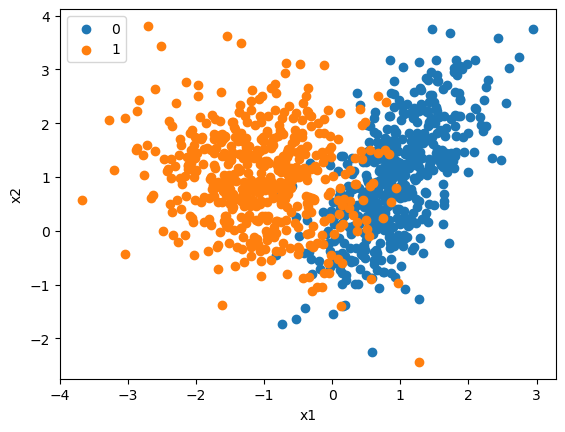

In [63]:
plt.scatter(df["x1"][df["class"]==0], df["x2"][df["class"]==0],label="0")
plt.scatter(df["x1"][df["class"]==1], df["x2"][df["class"]==1],label="1")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

In [77]:
model = Neural_network(1,2,activation_function=Softplus(),alpha=0.05,n_epochs=50)
model.train(Xtrain,ytrain)
preds = model.predict(Xtest)
print(f"Accuracy: {accuracy_score(ytest, preds)}")

Epoch 1 - erro = 0.08651772937208595
Epoch 2 - erro = 0.03543342201921383
Epoch 3 - erro = 0.03052308741082009
Epoch 4 - erro = 0.029268541889789113
Epoch 5 - erro = 0.028748626390853214
Epoch 6 - erro = 0.028605947158485513
Epoch 7 - erro = 0.028345237555546215
Epoch 8 - erro = 0.028202022417427954
Epoch 9 - erro = 0.028021432006240802
Epoch 10 - erro = 0.027888758796842595
Epoch 11 - erro = 0.027833331774515552
Epoch 12 - erro = 0.027843924054186498
Epoch 13 - erro = 0.027795564952694148
Epoch 14 - erro = 0.027729304225782302
Epoch 15 - erro = 0.02773380109627513
Epoch 16 - erro = 0.027543017497845462
Epoch 17 - erro = 0.027715029486363858
Epoch 18 - erro = 0.02763087142289216
Epoch 19 - erro = 0.027622138209710396
Epoch 20 - erro = 0.027486176102189824
Epoch 21 - erro = 0.027659062823576646
Epoch 22 - erro = 0.0275459493196584
Epoch 23 - erro = 0.027529125809311657
Epoch 24 - erro = 0.02757701489903176
Epoch 25 - erro = 0.02754425171260336
Epoch 26 - erro = 0.027568831439478282
Epoc

In [78]:
from sklearn.metrics import recall_score, precision_score, matthews_corrcoef, confusion_matrix

print(f"Accuracy: {accuracy_score(ytest, preds)}")
print("MCC: ", matthews_corrcoef(ytest,preds))
print("Precision: ", precision_score(ytest,preds))
print("Recall: ", recall_score(ytest,preds))
print(confusion_matrix(ytest,preds))


Accuracy: 0.925
MCC:  0.8520901845725957
Precision:  0.956989247311828
Recall:  0.89
[[96  4]
 [11 89]]
